# Создаем идеальный лимонад с помощью регрессии и градиентного спуска

Мы — начинающие предприниматели и хотим создать идеальный лимонад. По отзывам людей, вкус лимонада зависит от трёх параметров:

- \(x_1\) — количество лимонного сока (мл),
- \(x_2\) — количество сахара (г),
- \(x_3\) — уровень газированности.

Наша задача — построить модель, которая будет предсказывать оценку вкуса лимонада \(y\), основываясь на этих параметрах, с максимальной точностью.

---


## 1. Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Загружаем датасет
uploaded = files.upload()

df = pd.read_csv("lemonade_3d_dataset.csv")
df.head()

## 2. Подготовка данных
Извлечём наши признаки и целевую переменную:

In [ ]:
X1 = df["lemon_juice_ml"].values  # x1 - лимонный сок
X2 = df["название"].values         # x2 - сахар
X3 = df["название"].values       # x3 - газированность
Y = df["название"].values           # y - рейтинг
n = len(Y)                        # n - количество примеров

## 3. Модель линейной регрессии и функция ошибки

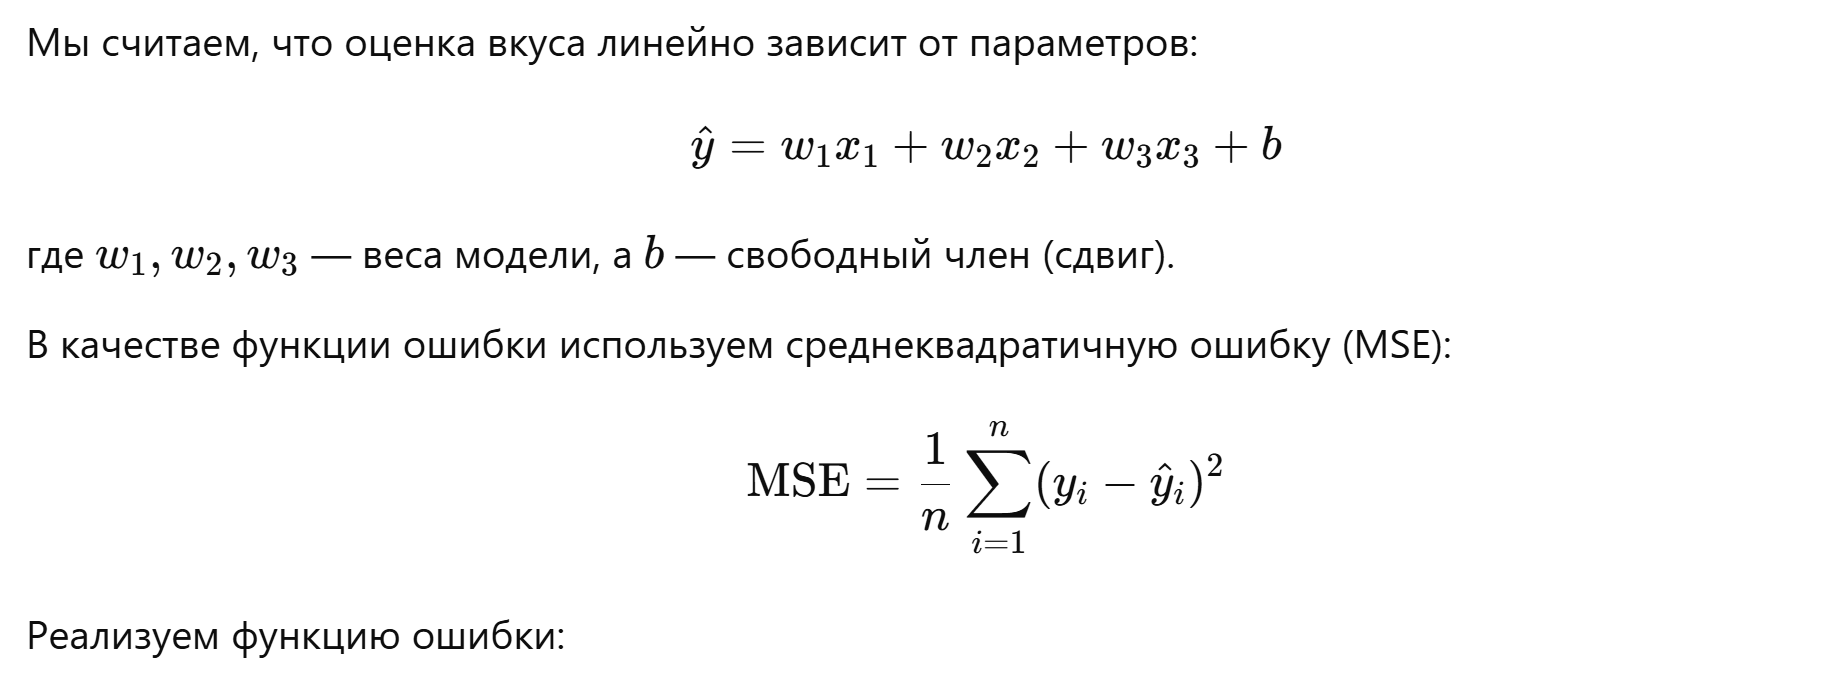

Параметры:
*   y_true — массив с реальными (истинными) значениями (например, оценки пользователей).

*   y_pred — массив с предсказанными значениями, которые выдала модель.

np.mean(...) - рассчитывает среднюю сумму

In [ ]:
def mse(y_true, y_pred):
    return np.mean(...)

##4. Градиентный спуск — метод обучения модели

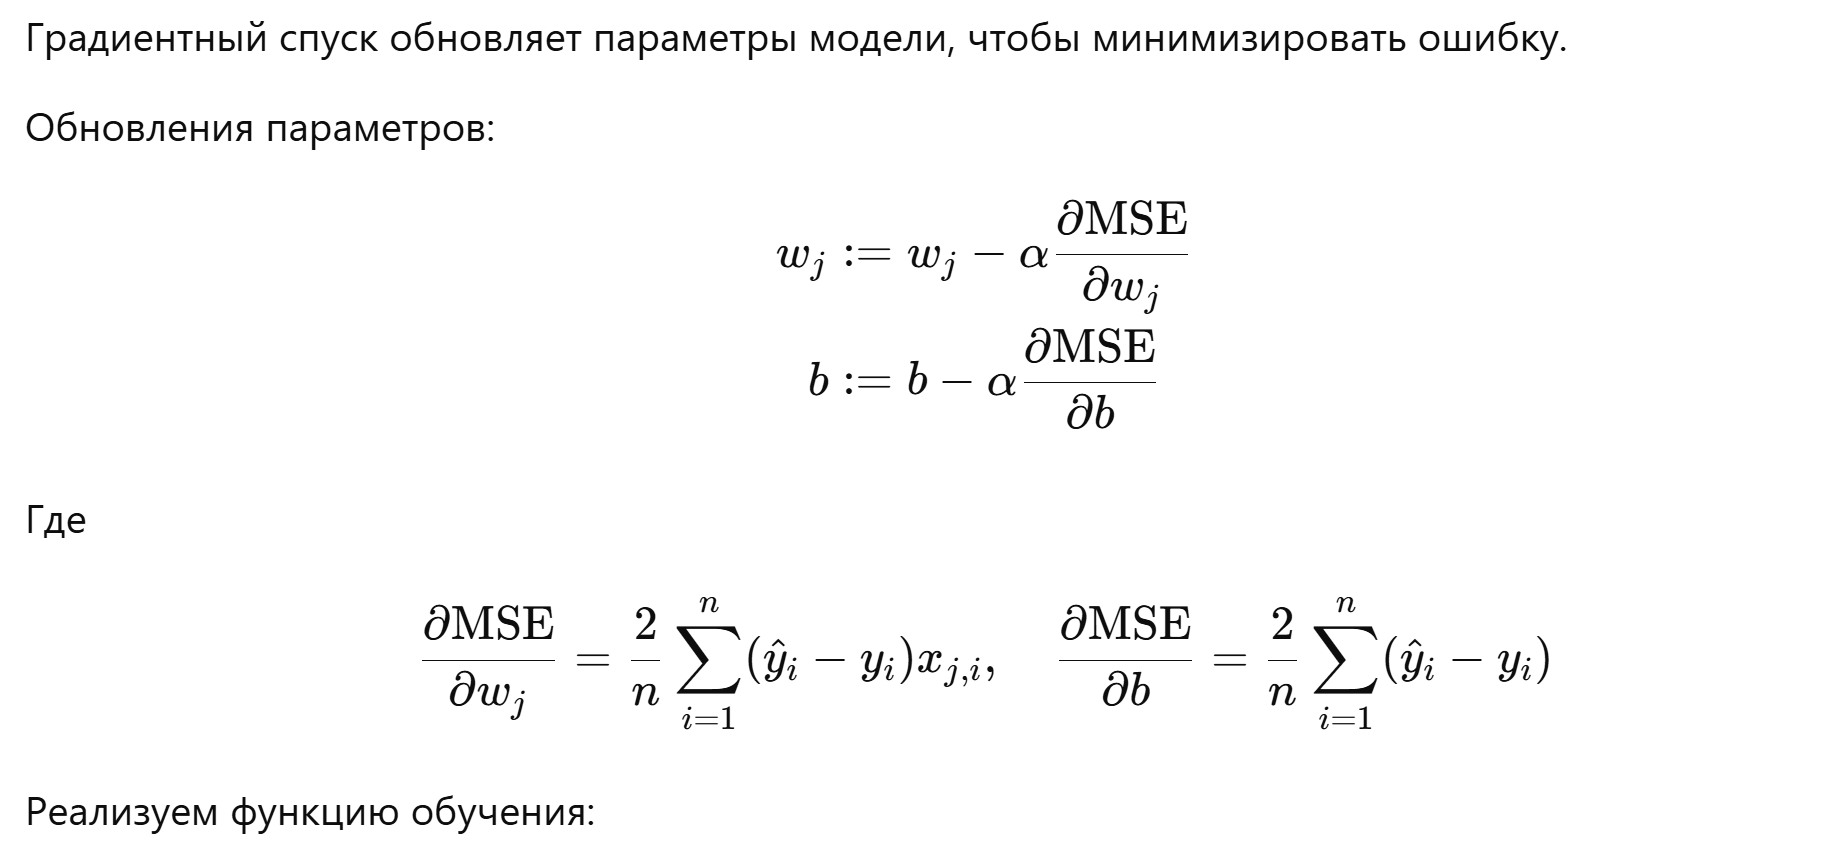

Нам понадобятся две последние формулы для подсчета производных (градиента) по wi и b. Для подсчета шага (обновления параметров) нужны первые 2 формулы.
для поиска произведения вектора ошибки на ветор х, воспользуйтесь: 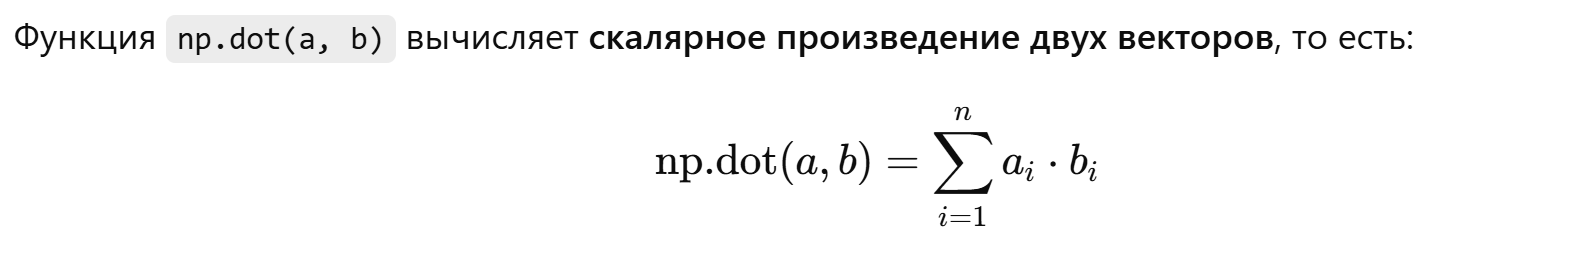

In [ ]:
def gradient_descent(X1, X2, X3, Y, alpha=0.0001, epochs=1000):
    w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0 # начальное значение коэффициентов уравнения многомерно регрессии
    n = len(Y) # количество объектов в выборке
    history = [] # массив для сохранения ошибки каждые 50 эпох

    for epoch in range(epochs):
         # посчитать предсказанное значение Y для многомерной регрессии с введенными коэффициентами
         # посчитать вектор ошибки - отклонение предсказанного от реального значения Y
         # подсчитать градиент для w1, w2, w3, b
         # обновить параметры уравнения

        # Сохраняем ошибку каждые 50 эпох: считаем ошибку MSE и добавляем в массив history
        if epoch ...:
          ...

    return w1, w2, w3, b, history


## 5. Обучение модели и анализ результатов

In [ ]:
alpha = 0.0001
epochs = 1000

w1, w2, w3, b, history = gradient_descent(X1, X2, X3, Y, alpha=alpha, epochs=epochs)

print(f"Финальные параметры:")
print(f"w1 (лимонный сок): {w1:.4f}")
print(f"w2 (сахар):         {w2:.4f}")
print(f"w3 (газ):           {w3:.4f}")
print(f"b (свободный член): {b:.4f}")

Финальные параметры:
w1 (лимонный сок): 0.0698
w2 (сахар):         0.0789
w3 (газ):           0.4650
b (свободный член): 0.0448


## 6. График изменения ошибки по эпохам

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(history)) * 50, history, marker='o')
plt.title("Функция ошибки (MSE) по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

## 7. Кросс-валидация для подбора оптимального числа эпох
Кросс-валидация поможет определить, сколько эпох достаточно для обучения.

In [ ]:
from sklearn.model_selection import KFold

# x1, x2, x3 -
# y -
# epoch_list -
# alpha -
# k - количество частей, на которые будут разделены данные
def cross_val_epochs(X1, X2, X3, Y, epochs_list, alpha=0.0001, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42) #разделяем на k частей, shuffle=True - перед разбиением перемешиваем данные
    results = [] #массив результата

    for ep in epochs_list:
        fold_mse_list = [] #для каждой хотим узнать, какова будет средняя ошибка на валидации.

        for train_idx, val_idx in kf.split(X1): # вручную делим данные на тестовые и для валидации
            x1_train, x1_val = X1[train_idx], X1[val_idx]
            x2_train, x2_val = ...
            x3_train, x3_val = ...
            y_train, y_val = ...

            w1_cv, w2_cv, w3_cv, b_cv, _ = ... # выполняем градиентный спуск и получаем значения для переменных
            y_pred_val = ... # находим предсказнные значения в валидационной выборке
            fold_mse_list.append(...) # вычисляем ошибку и добавляем в массив

        avg_mse = ... #вычисляем среднюю ошибку с помощью np.mean(...)
        results.append((ep, avg_mse))

    return results

In [ ]:
epochs_range = [a, b, c, d, e...] # выбрать количество эпох. Рекомендую: [100, 300, 500, 700, 1000, 1500, 2000]
epoch_results = cross_val_epochs(X1, X2, X3, Y, epochs_range)

epoch_vals = [r[0] for r in epoch_results]
mse_vals = [r[1] for r in epoch_results]

plt.figure(figsize=(8, 5))
plt.plot(epoch_vals, mse_vals, marker='o')
plt.title("Подбор количества эпох по среднему MSE (кросс-валидация)")
plt.xlabel("Количество эпох")
plt.ylabel("Среднее MSE")
plt.grid(True)
plt.show()

## 8. Использование модели для предсказания

In [ ]:
def predict(lemon_juice_ml, sugar_g, fizziness): # метод для предсказания значения рейтинга, используйте найденные коэффициенты w1, w2, w3, b
    return ...

In [ ]:
example = {
    "lemon_juice_ml": 45,
    "sugar_g": 25,
    "fizziness": 6
}

predicted_rating = predict(**example)
print(f"Предсказание оценки вкуса при x1={example['lemon_juice_ml']}, x2={example['sugar_g']}, x3={example['fizziness']}: {predicted_rating:.2f} из 10")

## 9. Визуализация зависимости оценки от каждого параметра
Для каждого параметра построим график зависимости оценки и линии предсказания модели, фиксируя остальные параметры на средних значениях.

In [ ]:
def plot_feature_vs_target(X, Y, w_target, label, fixed_values, w_all, b):
    X_sorted = np.sort(X)
    if label == "Лимонный сок":
        x1, x2, x3 = X_sorted, fixed_values['sugar'], fixed_values['fizz']
    elif label == "Сахар":
        x1, x2, x3 = fixed_values['lemon'], X_sorted, fixed_values['fizz']
    else:
        x1, x2, x3 = fixed_values['lemon'], fixed_values['sugar'], X_sorted

    Y_pred = w_all[0] * x1 + w_all[1] * x2 + w_all[2] * x3 + b

    plt.figure(figsize=(8, 5))
    plt.scatter(X, Y, alpha=0.4, label="Реальные оценки")
    plt.plot(X_sorted, Y_pred, color="red", linewidth=2, label="Прогноз модели")
    plt.xlabel(label)
    plt.ylabel("Оценка вкуса")
    plt.title(f"Зависимость оценки от {label.lower()}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
fixed = {
    'lemon': np.mean(X1),
    'sugar': np.mean(X2),
    'fizz': np.mean(X3)
}

plot_feature_vs_target(X1, Y, w1, "Лимонный сок", fixed, (w1, w2, w3), b)
plot_feature_vs_target(X2, Y, w2, "Сахар", fixed, (w1, w2, w3), b)
plot_feature_vs_target(X3, Y, w3, "Газированность", fixed, (w1, w2, w3), b)

## 10. Визуализация траектории градиентного спуска в пространстве параметров (опционально)
Это помогает понять, как изменяются параметры модели во время обучения.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Для наглядности возьмем два признака и bias (свободный член в регрессии, коэффициент сдвига)
trajectory = []
epochs_vis = 200

w1_vis, w2_vis, b_vis = 0.0, 0.0, 0.0

for epoch in range(epochs_vis):
    y_pred = w1_vis * X1 + w2_vis * X2 + w3 * X3 + b_vis
    error = y_pred - Y

    dw1 = 2 * np.mean(error * X1)
    dw2 = 2 * np.mean(error * X2)
    db = 2 * np.mean(error)

    w1_vis -= alpha * dw1
    w2_vis -= alpha * dw2
    b_vis -= alpha * db

    trajectory.append((w1_vis, w2_vis, b_vis))

trajectory = np.array(trajectory)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], 'o-', color='red', label='Траектория градиента')
ax.scatter(trajectory[0,0], trajectory[0,1], trajectory[0,2], color='green', s=100, label='Начало')
ax.scatter(trajectory[-1,0], trajectory[-1,1], trajectory[-1,2], color='blue', s=100, label='Конец')

ax.set_xlabel('w1 (лимонный сок)')
ax.set_ylabel('w2 (сахар)')
ax.set_zlabel('b (сдвиг)')
ax.set_title('Траектория движения градиентного спуска')
ax.legend()
plt.show()